CNN

In [1]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.9.2'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
import tensorflow
from tensorflow.keras.optimizers import Adam # or RMSprop
from tensorflow.keras.utils import to_categorical , plot_model
from keras import backend as K
from keras.layers import Dense
from keras.layers import Dense , Activation , Flatten
from keras.layers.convolutional import Conv2D , MaxPooling2D



In [3]:
import random
random.seed(0)

import warnings
warnings.filterwarnings('ignore')


Loading MNIST dataset



In [4]:
from tensorflow.keras.datasets import mnist
(X_train , y_train ) , (X_test , y_test) = mnist.load_data()

Let's visualize some numbers using matplotlib

Label: 0


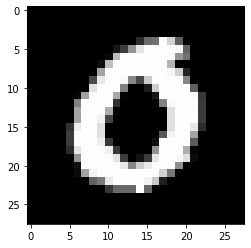

In [5]:
print("Label: {}" .format(y_train[8000]))
plt.imshow(X_train[8000] , cmap = 'gray')

**DATA PREPROCESSING**

In [6]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


Reshape

In [7]:
X_train = X_train.reshape(X_train.shape[0] , 28,28,1)
X_test = X_test.reshape(X_test.shape[0] , 28,28,1)

In [8]:
X_train.shape

(60000, 28, 28, 1)

Normalize Data

In [9]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

Print shape of data and number of images

In [10]:
print("X_train shape:", X_train.shape)
print("Images in X_train:", X_train.shape[0])
print("Images in X_test:", X_test.shape[0])
print("Max value in X_train:", X_train.max())
print("Min value in X_train:", X_train.min())

X_train shape: (60000, 28, 28, 1)
Images in X_train: 60000
Images in X_test: 10000
Max value in X_train: 1.0
Min value in X_train: 0.0


One-hot encode the class vector 

In [11]:
y_train = to_categorical(y_train , num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

print("Shape of y_train: " , y_train.shape)
print("One value of y_train" , y_train[0])

Shape of y_train:  (60000, 10)
One value of y_train [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


**Building Convolution Neural Network**

*   define a sequential model
*   add 2 convolutional layers

1.   no of filters: 32
2.   kernel size: 3x3
3.   activation: "relu"
4.   input shape: (28, 28, 1) for first layer

* flatten the data
1.    add Flatten later
2.    flatten layers flatten 2D arrays to 1D array before building the fully connected layers

* add 2 dense layers
1.    number of neurons in first layer: 128
2.    number of neurons in last layer: number of classes
3.    activation function in first layer: relu
4.    activation function in last layer: softmax
5.    we may experiment with any number of neurons for the first Dense layer; however, the final Dense layer must have neurons equal to the number of output classes

In [12]:
model = Sequential()

model.add(Conv2D(filters = 32 , kernel_size = 3 , activation = 'relu' , input_shape = (28,28,1)))
model.add(Conv2D(filters = 32 , kernel_size = 3 , activation = 'relu'))
model.add(Flatten()) #Flattening is used to convert all the resultant 2-Dimensional arrays from pooled feature maps into a single long continuous linear vector.
model.add(Dense(128 , activation = 'relu'))
model.add(Dense(10 , activation = 'softmax'))

**Compile and fit the model**

### Compile and fit the model
- let's compile our model
    - loss: "categorical_crossentropy"
    - metrics: "accuracy"
    - optimizer: "adam"
- then next step will be to fit model
    - give train data - training features and labels
    - batch size: 32
    - epochs: 10
    - give validation data - testing features and labels

In [13]:
model.compile(loss = 'categorical_crossentropy' , metrics = ['accuracy'] , optimizer = 'adam')

model.fit(x = X_train , y = y_train , batch_size = 32 , epochs = 10 , validation_split = 0.3)

Epoch 1/10
1313/1313 [==============================] - 14s 8ms/step - loss: 0.1302 - accuracy: 0.9599 - val_loss: 0.0640 - val_accuracy: 0.9806
Epoch 2/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0408 - accuracy: 0.9869 - val_loss: 0.0536 - val_accuracy: 0.9851
Epoch 3/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0248 - accuracy: 0.9919 - val_loss: 0.0530 - val_accuracy: 0.9848
Epoch 4/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0156 - accuracy: 0.9949 - val_loss: 0.0598 - val_accuracy: 0.9850
Epoch 5/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0115 - accuracy: 0.9961 - val_loss: 0.0610 - val_accuracy: 0.9855
Epoch 6/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0096 - accuracy: 0.9970 - val_loss: 0.0640 - val_accuracy: 0.9863
Epoch 7/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0088 - accuracy: 0.9970 - val_loss: 0.0790 - val_accuracy

Final loss and accuracy

In [14]:
loss , acc = model.evaluate(X_test , y_test)
print("\n Test accuracy: %.lf%%" %(100.0*acc))

loss , acc = model.evaluate(X_train , y_train)
print("\n Train accuracy: %.lf%%" %(100.0*acc))

313/313 [==============================] - 1s 3ms/step - loss: 0.0729 - accuracy: 0.9860

 Test accuracy: 99%
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0311 - accuracy: 0.9942

 Train accuracy: 99%


### Initialize a sequential model again
- define a sequential model
- add 2 convolutional layers
    - no of filters: 32
    - kernel size: 3x3
    - activation: "relu"
    - input shape: (28, 28, 1) for first layer
- add a max pooling layer of size 2x2
- add a dropout layer
    - dropout layers fight with the overfitting by disregarding some of the neurons while training
    - use dropout rate 0.2
- flatten the data
    - add Flatten later
    - flatten layers flatten 2D arrays to 1D array before building the fully connected layers
- add 2 dense layers
    - number of neurons in first layer: 128
    - number of neurons in last layer: number of classes
    - activation function in first layer: relu
    - activation function in last layer: softmax
    - we may experiment with any number of neurons for the first Dense layer; however, the final Dense layer must have neurons equal to the number of output classes

In [15]:
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size =3 , activation = 'relu' , input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size =3 , activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(rate = 0.2))
model.add(Flatten())
model.add(Dense(128 , activation = 'relu'))
model.add(Dense(10 , activation = 'softmax'))

### Compile and fit the model
- let's compile our model
    - loss: "categorical_crossentropy"
    - metrics: "accuracy"
    - optimizer: "adam"
- Use EarlyStopping
- then next step will be to fit model
    - give train data - training features and labels
    - batch size: 32
    - epochs: 10
    - give validation data - testing features and labels

In [16]:
model.compile(loss = 'categorical_crossentropy' , metrics = ['accuracy'] , optimizer = 'adam')

callback = tensorflow.keras.callbacks.EarlyStopping(monitor = 'val_accuracy' , patience = 2 , min_delta = 0.01)

model.fit(x = X_train , y = y_train , batch_size = 32 , epochs = 10 , validation_data = (X_test , y_test) , callbacks = [callback])

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1315 - accuracy: 0.9600 - val_loss: 0.0496 - val_accuracy: 0.9835
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0448 - accuracy: 0.9854 - val_loss: 0.0377 - val_accuracy: 0.9865
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0291 - accuracy: 0.9908 - val_loss: 0.0295 - val_accuracy: 0.9904


1/1 [==============================] - 0s 112ms/step
Predicted label: 6
Softmax Outputs: [[3.2912480e-06 4.5719277e-09 2.6326313e-10 3.5168798e-11 1.9377767e-07
  2.5633037e-07 9.9999619e-01 2.0899703e-08 5.2438530e-08 2.6211927e-10]]
1.0


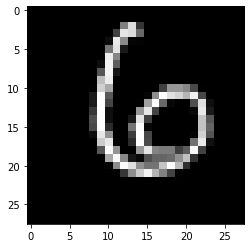

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_test[100].reshape(28, 28), cmap='gray')
y_pred = model.predict(X_test[100].reshape(1, 28, 28, 1))
print("Predicted label:", y_pred.argmax())
print("Softmax Outputs:", y_pred)
print(y_pred.sum())

Final loss and accuracy

In [18]:
model.evaluate(X_test , y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0295 - accuracy: 0.9904


[0.029515139758586884, 0.9904000163078308]

In [19]:
loss , acc = model.evaluate(X_test , y_test)
print("\n Test accuracy: %.lf%%" %(100.0*acc))

313/313 [==============================] - 1s 3ms/step - loss: 0.0295 - accuracy: 0.9904

 Test accuracy: 99%


In [20]:
loss , acc = model.evaluate(X_train , y_train)
print("\n Train accuracy: %.lf%%" %(100.0*acc))

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0118 - accuracy: 0.9966

 Train accuracy: 100%
